### Create Database

In [1]:
import csv
import sqlite3

# Use a context manager to handle the connection
with sqlite3.connect('Supershop_Database.db') as conn:
    cursor = conn.cursor()

    # Create the Products table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Product (
            Product_Sku INTEGER,
            Product_Category TEXT,
            Product_Subcategory TEXT,
            Product_Name TEXT,
            Price REAL,
            Cost REAL
        )
    ''')

    # Create the Orders table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Orders (
            Order_Number INTEGER,
            Sku INTEGER,
            Customer_ID INTEGER,
            Sales_Quantity REAL,
            Ordered_Month DATE
        )
    ''')

    # Create the Customers table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Customer (
            Customer_ID INTEGER,
            Discount REAL,
            Delivery_Option TEXT,
            Customer_Location TEXT
        )
    ''')

    # Create the Inventory table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Inventory (
            Product_Name TEXT,
            Inventory_Inbound INTEGER,
            Inventory_Outbound INTEGER,
            Total_Sales_Quantity INTEGER
        )
    ''')

    # Read data from CSV file and insert into the Products table
    with open('Product.csv', 'r') as product_csv_file:
        product_csv_reader = csv.reader(product_csv_file)
        next(product_csv_reader)  # Skip header row if present

        for product_row in product_csv_reader:
            cursor.execute('''
                INSERT INTO Product (Product_Sku, Product_Category, Product_Subcategory, Product_Name, Price, Cost)
                VALUES (?, ?, ?, ?, ?, ?)
            ''', (product_row[0], product_row[1], product_row[2], product_row[3], product_row[4], product_row[5]))

    # Read data from CSV file and insert into the Orders table
    with open('Orders.csv', 'r') as orders_csv_file:
        orders_csv_reader = csv.reader(orders_csv_file)
        next(orders_csv_reader)  # Skip header row if present

        for order_row in orders_csv_reader:
            cursor.execute('''
                INSERT INTO Orders (Order_number,Sku, Customer_ID, Sales_Quantity, Ordered_Month)
                VALUES (?, ?, ?, ?, ?)
            ''', (order_row[0], order_row[1], order_row[2], order_row[3],order_row[4]))

    # Read data from CSV file and insert into the Customers table
    with open('Customer.csv', 'r') as customer_csv_file:
        customer_csv_reader = csv.reader(customer_csv_file)
        next(customer_csv_reader)  # Skip header row if present

        for customer_row in customer_csv_reader:
            cursor.execute('''
                INSERT INTO Customer (Customer_ID, Discount, Delivery_Option, Customer_Location)
                VALUES (?, ?, ?, ?)
            ''', (customer_row[0], customer_row[1], customer_row[2], customer_row[3]))

    # Read data from CSV file and insert into the Inventory table
    with open('Inventory.csv', 'r') as inventory_csv_file:
        inventory_csv_reader = csv.reader(inventory_csv_file)
        next(inventory_csv_reader)  # Skip header row if present

        for inventory_row in inventory_csv_reader:
            cursor.execute('''
                INSERT INTO Inventory (Product_Name, Inventory_Inbound, Inventory_Outbound, Total_Sales_Quantity)
                VALUES (?, ?, ?, ?)
            ''', (inventory_row[0], inventory_row[1], inventory_row[2], inventory_row[3]))

### Sales Analysis:

#### Total sales over time

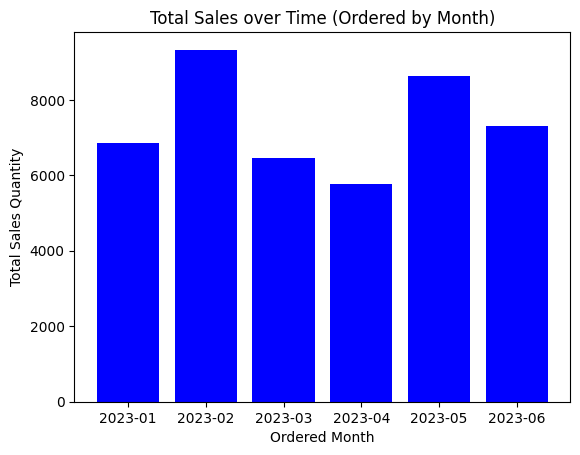

In [5]:
import sqlite3
import matplotlib.pyplot as plt
import calendar

# Connect to the SQLite database
with sqlite3.connect('Supershop_Database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Query to calculate total sales over time
    total_sales_query = '''
        SELECT Ordered_Month, SUM(Sales_Quantity) AS Total_Sales
        FROM Orders
        GROUP BY Ordered_Month
        ORDER BY Date(Ordered_Month ) ASC; 
    '''

    cursor.execute(total_sales_query)
    total_sales_result = cursor.fetchall()

    # Extracting data for the bar chart
    months = [row[0] for row in total_sales_result]
    total_sales = [row[1] for row in total_sales_result]

    # Create a bar chart
    plt.bar(months, total_sales, color='blue')
    plt.xlabel('Ordered Month')
    plt.ylabel('Total Sales Quantity')
    plt.title('Total Sales over Time (Ordered by Month)')
    plt.show()


#### Top-Selling Products:

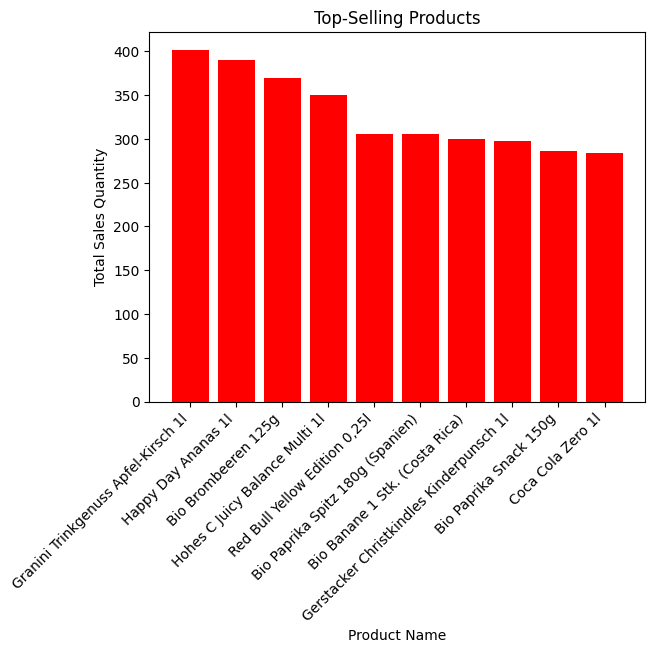

In [7]:
import matplotlib.pyplot as plt

# Connect to the SQLite database
with sqlite3.connect('Supershop_Database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
# Query to find top-selling products
    top_selling_products_query = '''
        SELECT Product_Name, SUM(Sales_Quantity) AS Total_Sales
        FROM Orders join Product
        ON Product.Product_Sku = Orders.Sku
        GROUP BY Product_Name
        ORDER BY Total_Sales DESC
        LIMIT 10;  -- You can adjust the limit to show more or fewer top products
    '''

    cursor.execute(top_selling_products_query)
    top_selling_products_result = cursor.fetchall()

    # Extracting data for the bar chart
    products = [row[0] for row in top_selling_products_result]
    product_sales = [row[1] for row in top_selling_products_result]

    # Create a bar chart for top-selling products
    plt.bar(products, product_sales, color='red')
    plt.xlabel('Product Name')
    plt.ylabel('Total Sales Quantity')
    plt.title('Top-Selling Products')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


#### Top-Selling Categories:

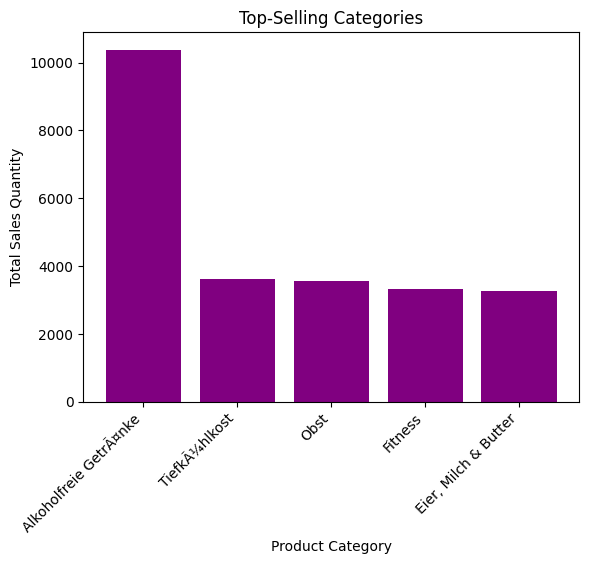

In [9]:
import matplotlib.pyplot as plt

# Connect to the SQLite database
with sqlite3.connect('Supershop_Database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
     # Query to find top-selling categories
    top_selling_categories_query = '''
        SELECT p.Product_Category, SUM(o.Sales_Quantity) AS Total_Sales
        FROM Orders o
        JOIN Product p ON o.Sku = p.Product_Sku
        GROUP BY p.Product_Category
        ORDER BY Total_Sales DESC
        LIMIT 5;  -- You can adjust the limit to show more or fewer top categories
    '''

    cursor.execute(top_selling_categories_query)
    top_selling_categories_result = cursor.fetchall()

    # Extracting data for the bar chart
    categories = [row[0] for row in top_selling_categories_result]
    category_sales = [row[1] for row in top_selling_categories_result]

    # Create a bar chart for top-selling categories
    plt.bar(categories, category_sales, color='purple')
    plt.xlabel('Product Category')
    plt.ylabel('Total Sales Quantity')
    plt.title('Top-Selling Categories')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

#### Sales distribution by customer location.

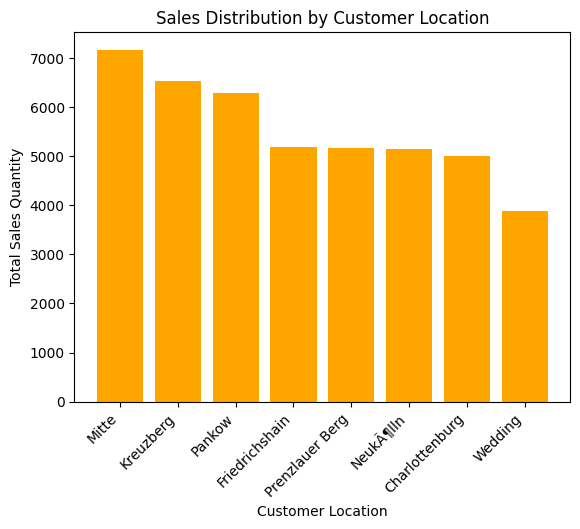

In [11]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
with sqlite3.connect('Supershop_Database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    # Query to analyze sales distribution by customer location
    sales_by_location_query = '''
        SELECT Customer_Location, SUM(Sales_Quantity) AS Total_Sales
        FROM Orders
        JOIN Customer ON Orders.Customer_ID = Customer.Customer_ID
        GROUP BY Customer_Location
        ORDER BY Total_Sales DESC;
    '''

    cursor.execute(sales_by_location_query)
    sales_by_location_result = cursor.fetchall()

    # Extracting data for the bar chart
    locations = [row[0] for row in sales_by_location_result]
    location_sales = [row[1] for row in sales_by_location_result]

    # Create a bar chart for sales distribution by customer location
    plt.bar(locations, location_sales, color='orange')
    plt.xlabel('Customer Location')
    plt.ylabel('Total Sales Quantity')
    plt.title('Sales Distribution by Customer Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

#### Sales performance trends.

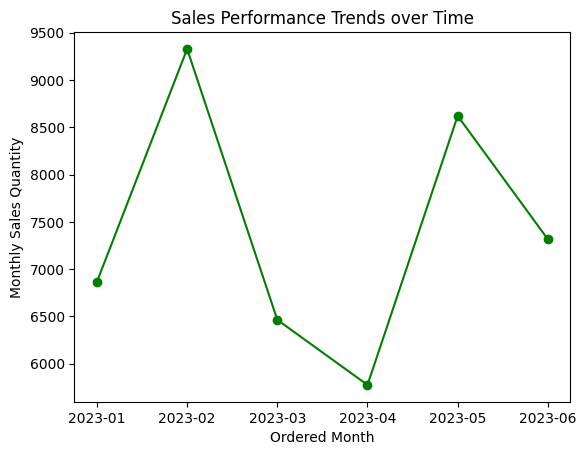

In [13]:
import matplotlib.pyplot as plt

# Connect to the SQLite database
with sqlite3.connect('Supershop_Database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

     # Query to analyze sales performance trends
    sales_trends_query = '''
        SELECT Ordered_Month, SUM(Sales_Quantity) AS Monthly_Sales
        FROM Orders
        GROUP BY Ordered_Month
        ORDER BY Date(Ordered_Month )ASC;  
    '''

    cursor.execute(sales_trends_query)
    sales_trends_result = cursor.fetchall()

    # Extracting data for the line chart
    months_trends = [row[0] for row in sales_trends_result]
    monthly_sales = [row[1] for row in sales_trends_result]

    # Create a line chart for sales performance trends
    plt.plot(months_trends, monthly_sales, marker='o', color='green', linestyle='-')
    plt.xlabel('Ordered Month')
    plt.ylabel('Monthly Sales Quantity')
    plt.title('Sales Performance Trends over Time')
    plt.show()


### Profitability Analysis

#### The most and least profitable products or categories.

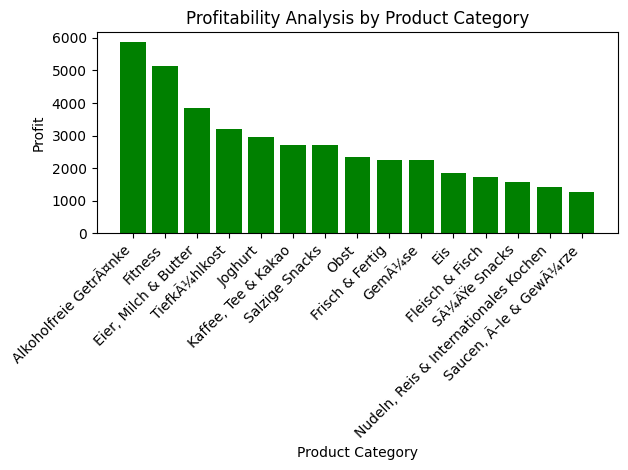

In [15]:
import matplotlib.pyplot as plt

# Connect to the SQLite database
with sqlite3.connect('Supershop_Database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    # Query to calculate profitability for each product
    profitability_query = '''
        SELECT Product_Category, SUM(Price * Sales_Quantity) - SUM(Cost * Sales_Quantity) AS Profit
        FROM Product
        JOIN Orders ON Product.Product_Sku = Orders.Sku
        GROUP BY Product_Category
        ORDER BY Profit DESC;
'''

    cursor.execute(profitability_query)
    profitability_result = cursor.fetchall()
     # Extracting data for the bar chart
    categories = [row[0] for row in profitability_result]
    profits = [row[1] for row in profitability_result]

    # Create a bar chart
    plt.bar(categories, profits, color='green')
    plt.xlabel('Product Category')
    plt.ylabel('Profit')
    plt.title('Profitability Analysis by Product Category')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


#### Profit distribution by customer location

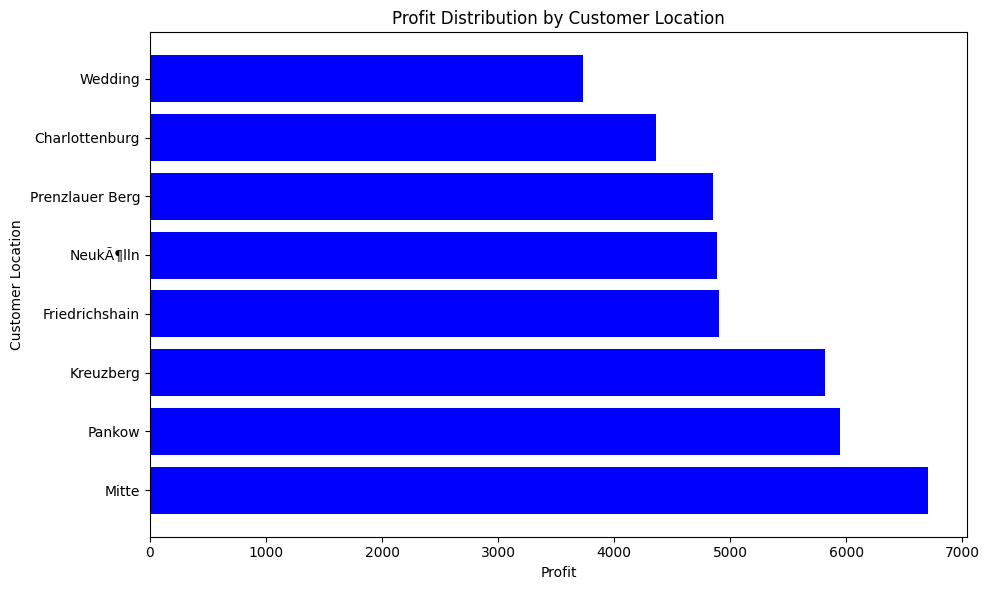

In [17]:
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
with sqlite3.connect('Supershop_Database.db') as conn:
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    # Query to calculate profitability for each customer location
    profitability_query = '''
        SELECT 
            Customer_Location,
            SUM(Price * Sales_Quantity) - SUM(Cost * Sales_Quantity) AS Profit,
            (SUM(Price * Sales_Quantity) - SUM(Cost * Sales_Quantity)) / SUM(Price * Sales_Quantity) AS Profit_Margin
        FROM Product
        JOIN Orders ON Product.Product_Sku = Orders.Sku
        JOIN Customer ON Orders.Customer_ID = Customer.Customer_ID
        GROUP BY Customer_Location
        ORDER BY Profit DESC;
    '''

    cursor.execute(profitability_query)
    profitability_result = cursor.fetchall()

    # Extracting data for the horizontal bar chart
    locations = [row[0] for row in profitability_result]
    profits = [row[1] for row in profitability_result]

    # Create a horizontal bar chart for profit distribution by customer location
    plt.figure(figsize=(10, 6))
    plt.barh(locations, profits, color='blue')
    plt.xlabel('Profit')
    plt.ylabel('Customer Location')
    plt.title('Profit Distribution by Customer Location')
    plt.tight_layout()
    plt.show()
